In [192]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [193]:
taxi_jan_2024 = pd.read_parquet(r'C:\Users\danie\Machine_Learning\datasets\yellow_tripdata_2024-01.parquet')
taxi_data = pd.concat([taxi_jan_2024])
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [194]:
taxi_data.shape

(2964624, 19)

In [195]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [196]:
taxi_data = taxi_data[['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'payment_type',  'total_amount']]
taxi_data[taxi_data['passenger_count'].isna()].shape

(140162, 6)

In [197]:
taxi_data[taxi_data['payment_type'] == 0].shape

(140162, 6)

In [198]:
taxi_data = taxi_data[taxi_data['payment_type'] != 0]
taxi_data['passenger_count'].isna().sum()

0

In [199]:
taxi_data.shape

(2824462, 6)

array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>],
       [<Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

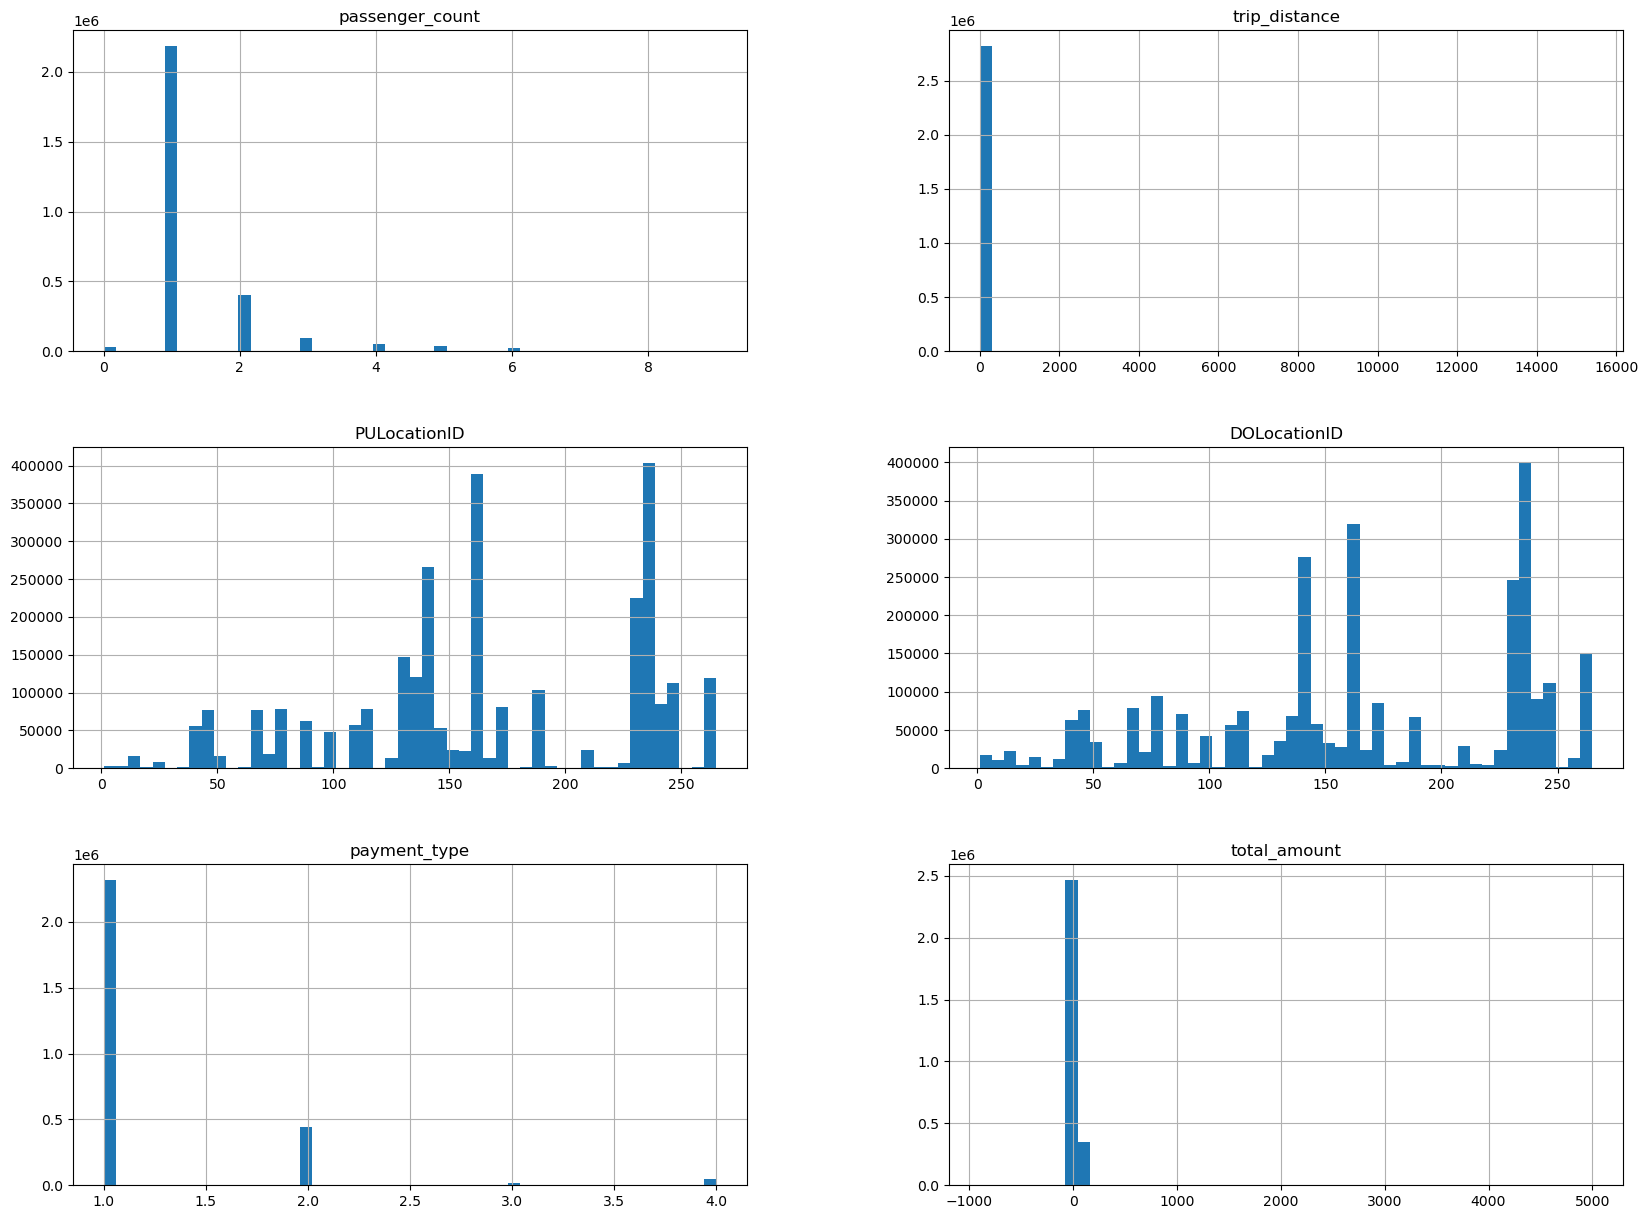

In [200]:
taxi_data.hist(bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'passenger_count'}>,
        <Axes: title={'center': 'trip_distance'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>],
       [<Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

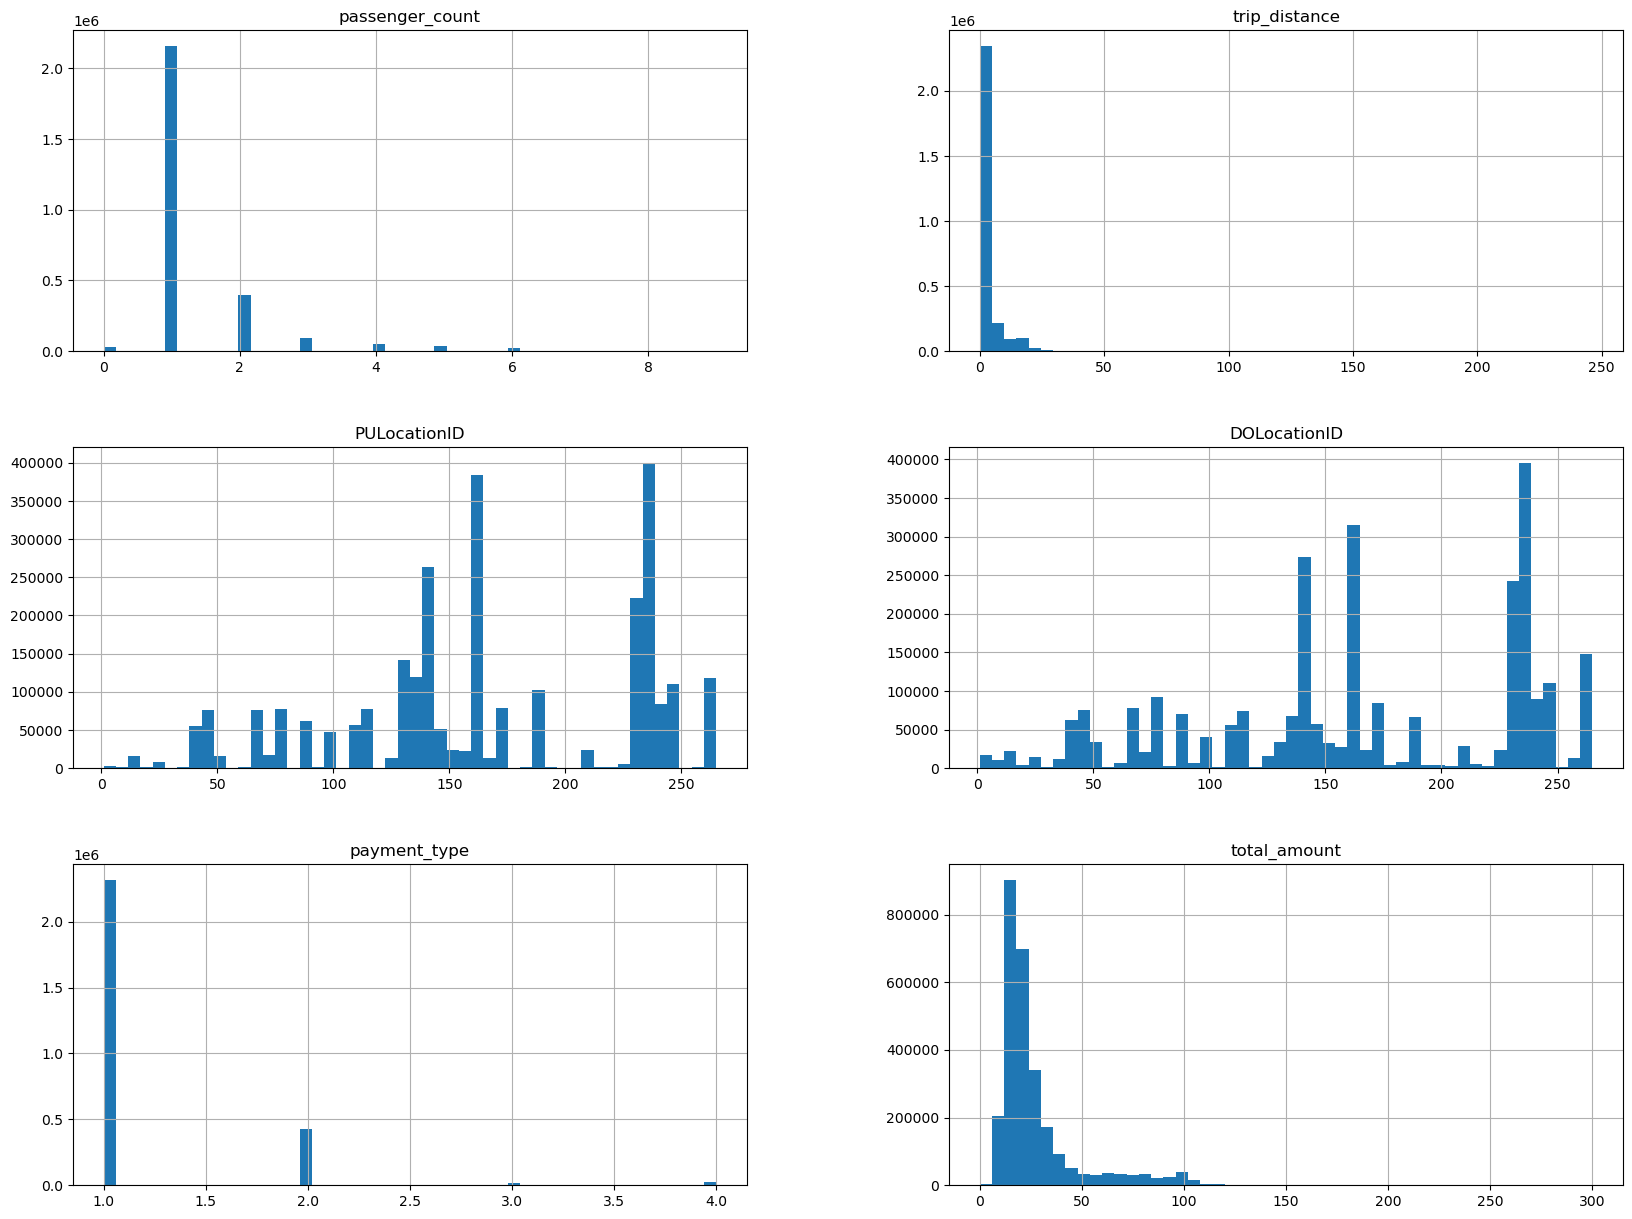

In [202]:
taxi_data = taxi_data[(taxi_data['trip_distance'] < 250) & (taxi_data['total_amount'] > 0) & (taxi_data['total_amount'] < 300)]
taxi_data.hist(bins=50, figsize=(20,15))

In [203]:
taxi_data.shape

(2788023, 6)